<a href="https://www.linkedin.com/in/amit-maindola-51801423/"><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>
<h1 align="center"><font size=5 color="DE5538">Wine Quality DataSet</font></h1>

# Introduction
In this Notebook we will analyse the Wine Quality Dateset from UCI Machine Learning Repository.  
We will use machine learning to predict the quality of the wine based on its physicochemical attributes.

The UCI Machine Learning Repository's Wine data set measures eleven physicochemical attributes, including the pH and alcohol content, of 1,599 different red wines. Each wine's quality has been scored by human judges. The scores range from zero to ten; zero is the worst quality and ten is the best quality.

Go through [Readme.md](./Readme.md) for more details

## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3 color="black">

1. <a href="#item1">Exploring DataSet</a>

2. <a href="#item2">Relationship Visualization</a>    

3. <a href="#item3">Preprocessing</a>

4. <a href="#item3">Model</a>
</font>
</div>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id=item2><font size=4 color="229C75">Exploring DataSet</font></a><br>
Let's load and explore the Dataset and analyze

In [5]:
# df = pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')
df = pd.read_csv('winequalityN.csv')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [3]:
# View the columns having Missing values
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Below are the observation about data
1. There are some missing data which needs to be Imputed
2. Almost all data is in Normalized form 
3. All columns are integer except the target column which is type of wine

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Import Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## to make this notebook's output stable across runs
np.random.seed(2210)

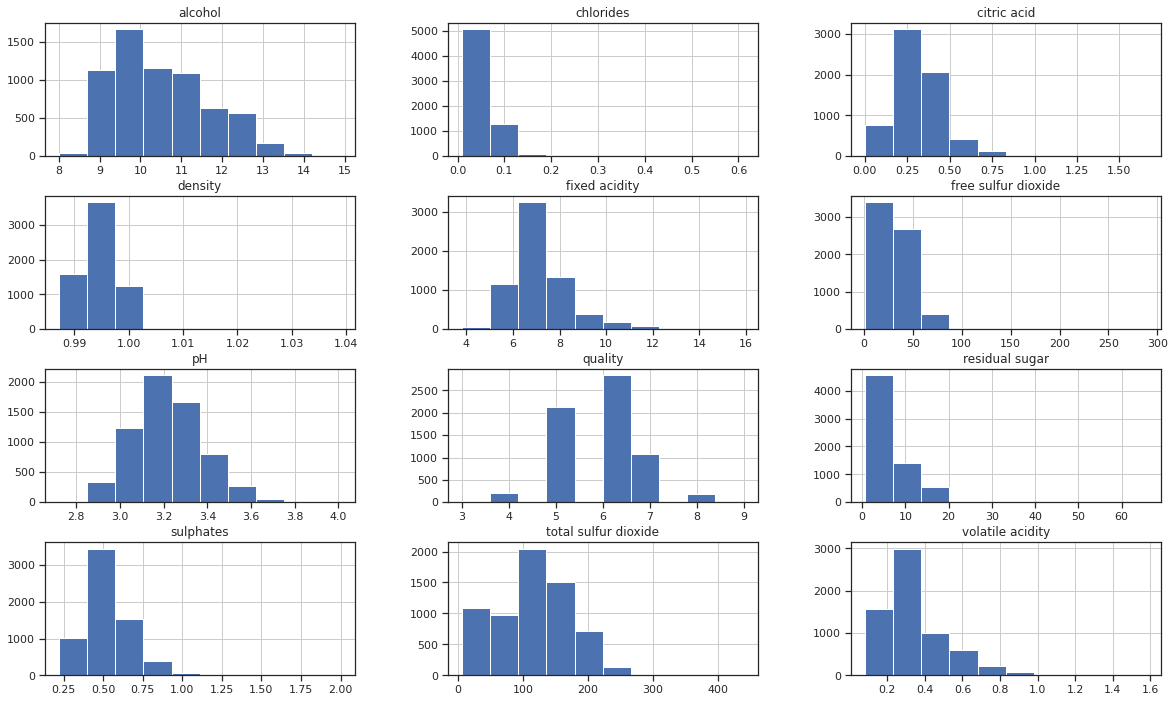

In [9]:
_ = df.hist(figsize=(20,12))

In [19]:
sns.__version__

'0.10.1'

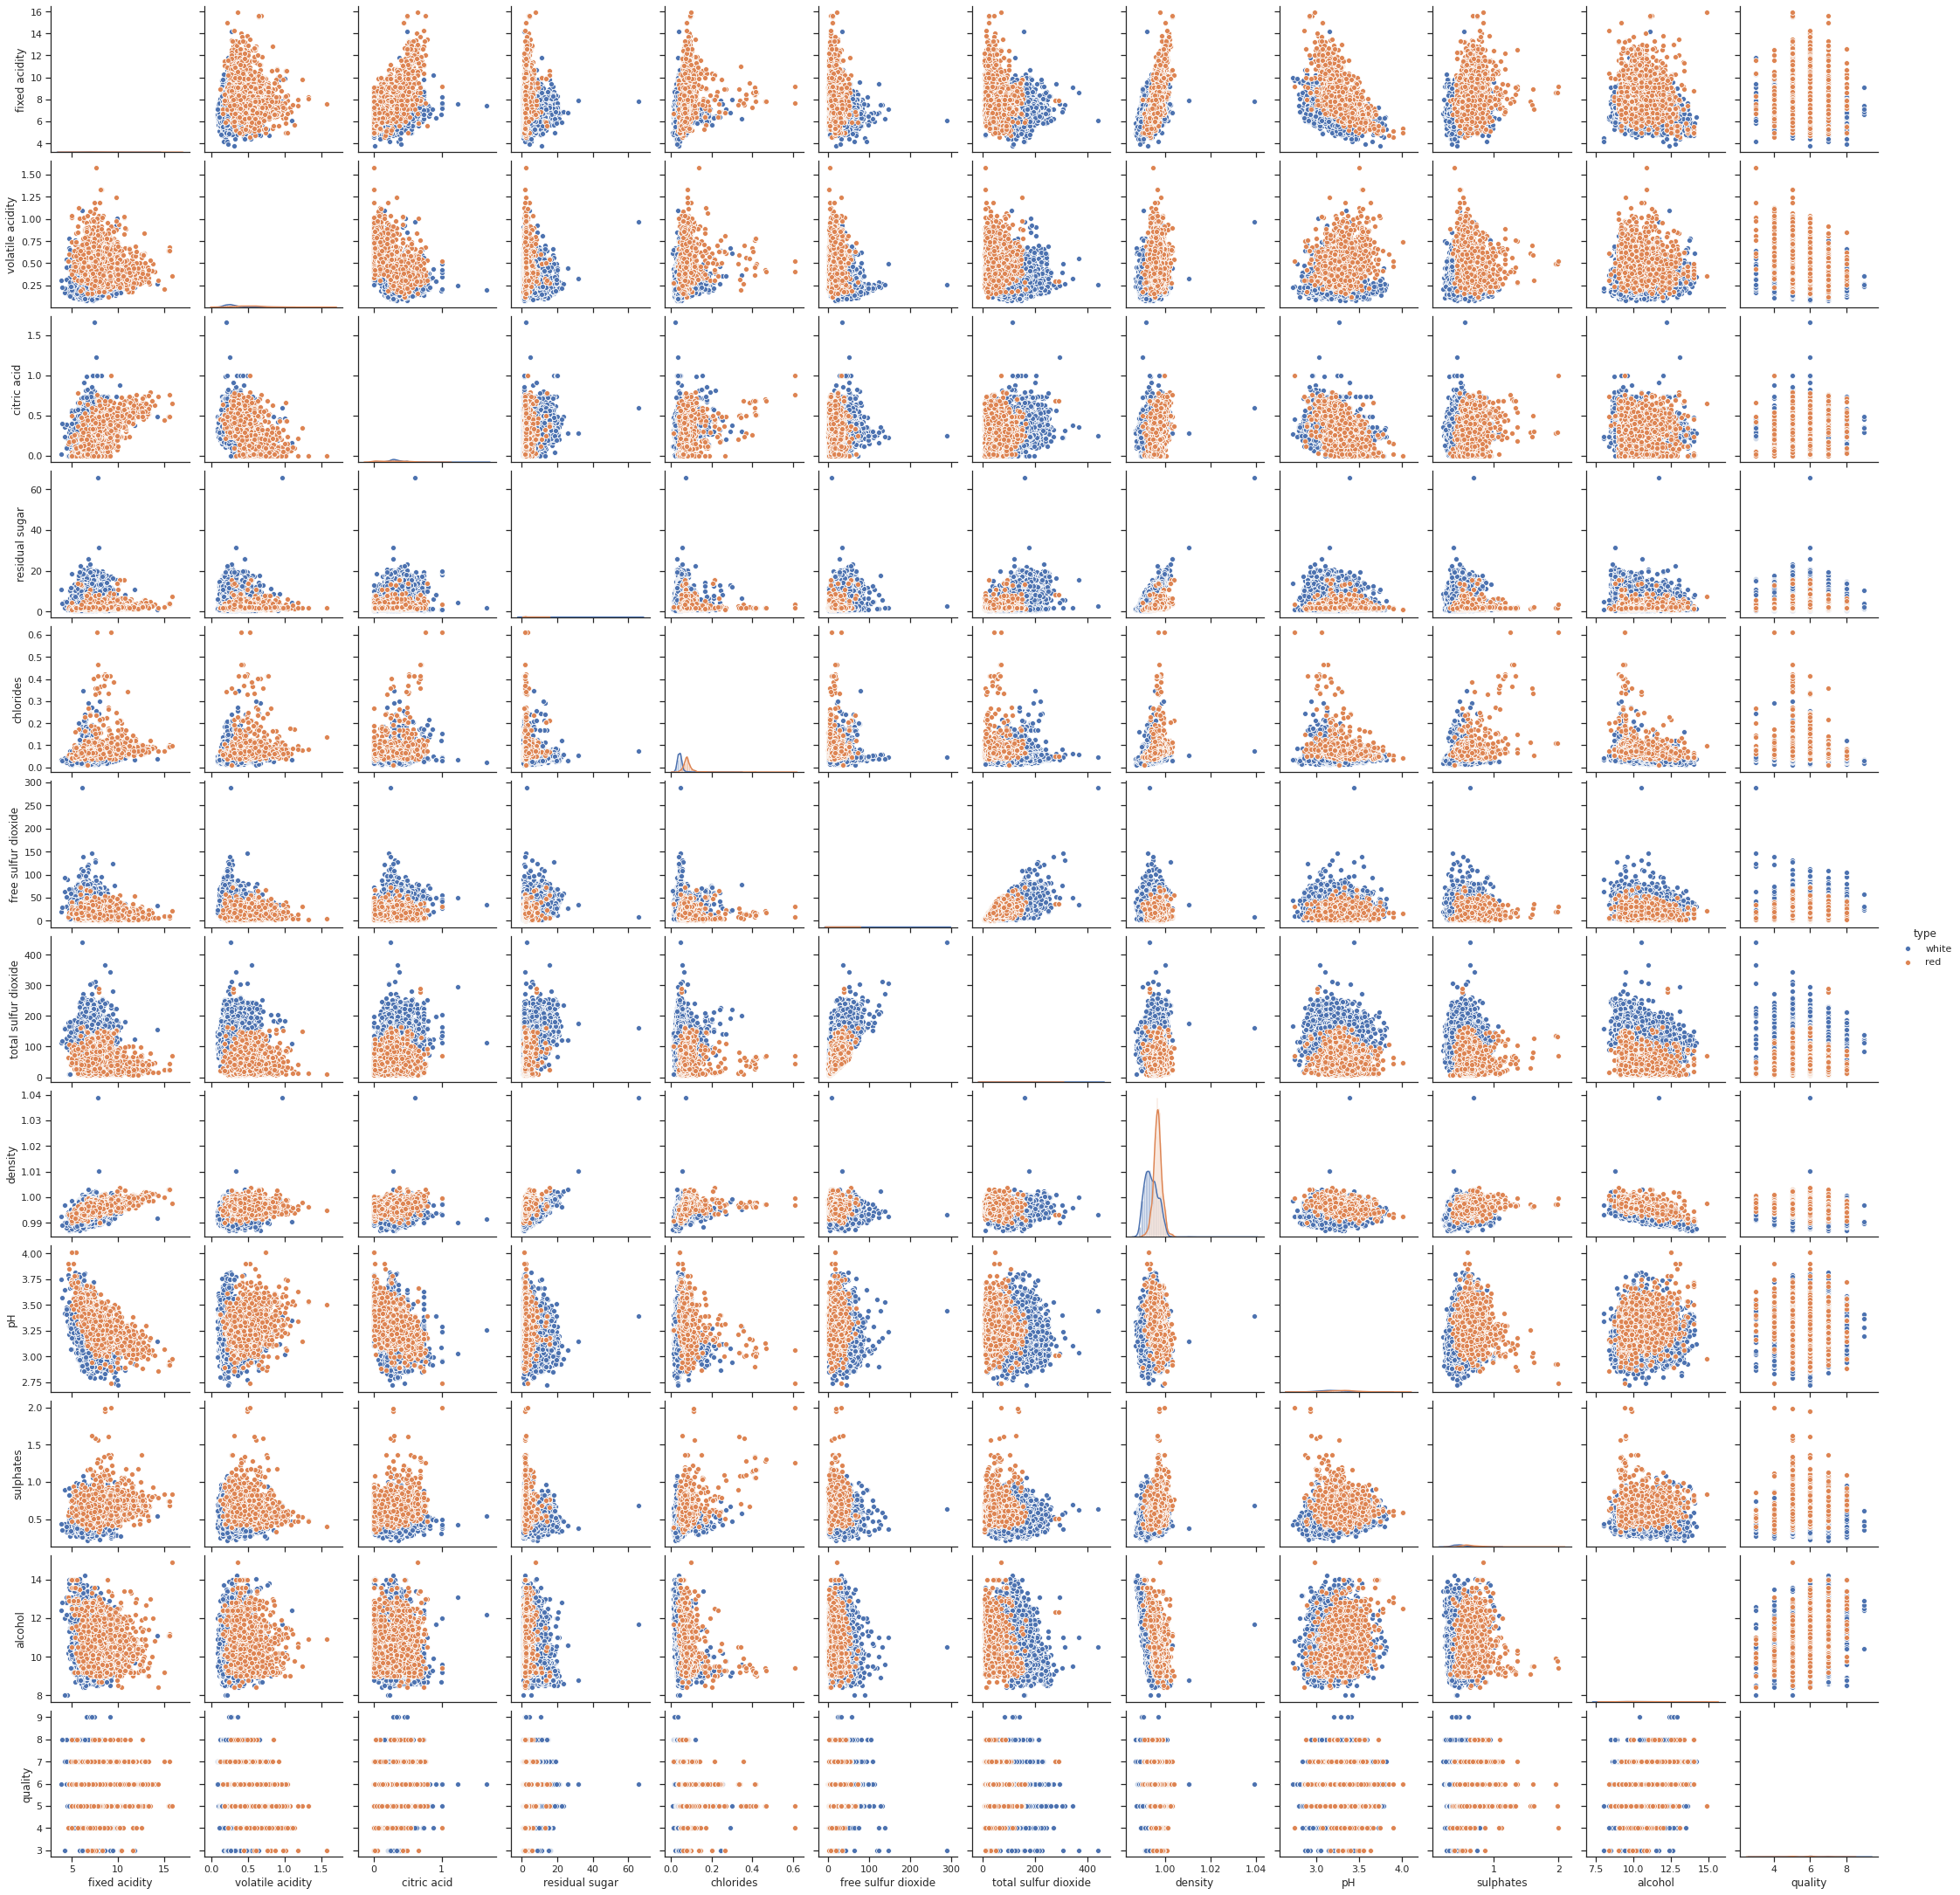

In [24]:
g = sns.PairGrid(df, hue="type")
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Define the Pipeline to Impute missing values, Label Encoding and Selecting best K features

In [8]:
def preproces_data(df):
    X, y = df.drop('type', axis=1), df['type']
    
    # Change target labels to numerical
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    y = label.fit_transform(y)
    y[:5]
    
    # Define the pipeline
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.feature_selection import SelectKBest, mutual_info_classif
    preprocess_pipe = Pipeline([
        ('impute', SimpleImputer(strategy='mean')),
        ('bestK', SelectKBest())
    ])
    

    # Preprocess data using pipeline
    print(f'X - Before shape : {X.shape}')
    X = preprocess_pipe.fit_transform(X, y)
    print(f'X - After preprocessing shape :{X.shape}')
    return X,y


In [9]:
X, y = preproces_data(df)

# Split data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

X - Before shape : (6497, 12)
X - After preprocessing shape :(6497, 10)


((5197, 10), (1300, 10))

## View accurracy with various Classification models

In [10]:
def fine_tune_model(mode, param_grid):
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Performing Grid search for {type(model).__name__} ...")
    print(f"Best parameters : {grid_search.best_params_} with score {grid_search.best_score_:.2}")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    cnf =  confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{cnf}\n{report}\n")
    print
    print(f"Accuracy of Model : {accuracy:.2}")    

In [11]:
%%time

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
param_grid = [{'splitter': ["best", "random"], 'criterion':['gini', 'entropy'], 'max_depth': range(2, 6)}]

fine_tune_model(model, param_grid)

Performing Grid search for DecisionTreeClassifier ...
Best parameters : {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'} with score 0.98

[[296   8]
 [ 14 982]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       304
           1       0.99      0.99      0.99       996

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300


Accuracy of Model : 0.98
CPU times: user 282 ms, sys: 65.9 ms, total: 348 ms
Wall time: 2.16 s


In [12]:
%%time

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = [{'bootstrap': [False, False], 'criterion':['gini', 'entropy'],
               'max_depth': range(2, 6), 'n_estimators': range(5, 10)
               }]

fine_tune_model(model, param_grid)

Performing Grid search for RandomForestClassifier ...
Best parameters : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 9} with score 0.99

[[301   3]
 [  4 992]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       304
           1       1.00      1.00      1.00       996

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Accuracy of Model : 0.99
CPU times: user 1.72 s, sys: 50.2 ms, total: 1.77 s
Wall time: 6.33 s


In [ ]:
%%time

from sklearn.svm import SVC
model = SVC()
param_grid = [{'kernel': ['poly', 'rbf', 'sigmoid'],
               'C': [0.1,1, 10],
               'gamma': ['scale', 'auto']
               }]

fine_tune_model(model, param_grid)

# The best accurracy and precision was given by Random Forest